### Исследование алгоритмов классификации. kNN/Decision Tree

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix, accuracy_score, roc_auc_score,
    precision_score, recall_score, f1_score
)

In [54]:
df = pd.read_csv('data/clean.csv')
df.sample(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1856,1786,0,2.6,0,6,0,14,1.0,115,4,...,616,912,3038,18,0,14,1,0,0,3
1272,1174,0,0.7,1,1,1,25,0.8,91,2,...,1097,1461,285,19,7,3,1,0,1,0
1979,1614,0,1.2,0,1,1,9,0.1,161,3,...,173,1219,1832,15,8,11,1,0,0,1
1353,1436,0,2.5,1,0,1,42,0.9,124,8,...,1826,1836,2736,12,5,19,1,1,0,3
186,1266,0,0.5,0,0,1,5,0.1,95,6,...,1365,1698,1687,11,0,18,1,0,0,2


### Класс-метка и сбалансированность

In [55]:
target = 'price_range'
df[target].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

### Метод k-ближайших соседей

In [56]:
# Разбиение на обучающую и тестовую выборки.
x_train, x_test, y_train, y_test = train_test_split(
    df.drop(target, axis=1), df[target], 
    test_size=0.2, random_state=0
)

Лучший k: 15


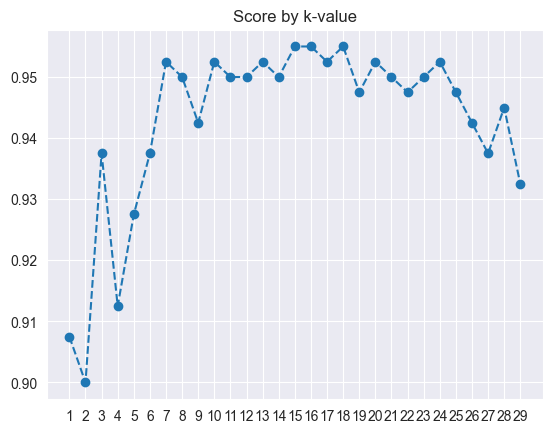

In [57]:
# Подбор числа k.
k_range = range(1, 30)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    knn_pred = knn.predict(x_test)
    score = accuracy_score(y_test, knn_pred)
    scores.append(score)

k = scores.index(max(scores)) + 1
print('Лучший k:', k)

plt.plot(k_range, scores, linestyle='dashed', marker='o')
plt.xticks(k_range)
plt.title("Score by k-value")
plt.show()

In [58]:
# Обучение модели.
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)

In [59]:
def metrics(test, pred, proba):
    """Отображение метрик."""
    cm = confusion_matrix(test, pred)
    sns.heatmap(cm, annot=True, cmap='coolwarm', cbar=False)
    plt.xlabel('Модель')
    plt.ylabel('Факт')
    
    df_metrics = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC'],
        'Score': [
            round(accuracy_score(test, pred), 3),
            round(precision_score(test, pred, average='weighted'), 3),
            round(recall_score(test, pred, average='weighted'), 3),
            round(f1_score(test, pred, average='weighted'), 3),
            round(roc_auc_score(test, proba, average='weighted', multi_class='ovr'), 3)
        ]
    })
    plt.show()
    print(df_metrics.to_string(index=False))

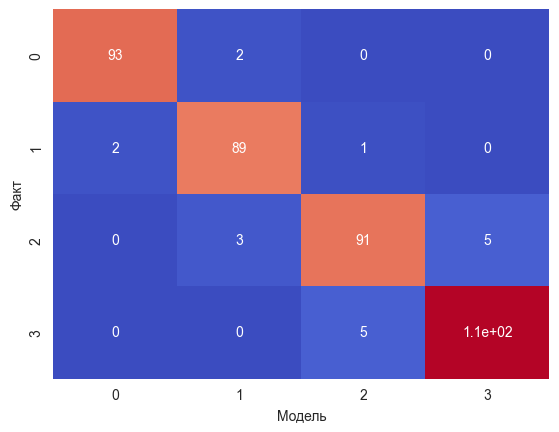

   Metric  Score
 Accuracy  0.955
Precision  0.955
   Recall  0.955
       F1  0.955
      ROC  0.996


In [60]:
metrics(y_test, knn_pred, knn.predict_proba(x_test))

### Дерево решений

In [61]:
# Обучение модели.
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)

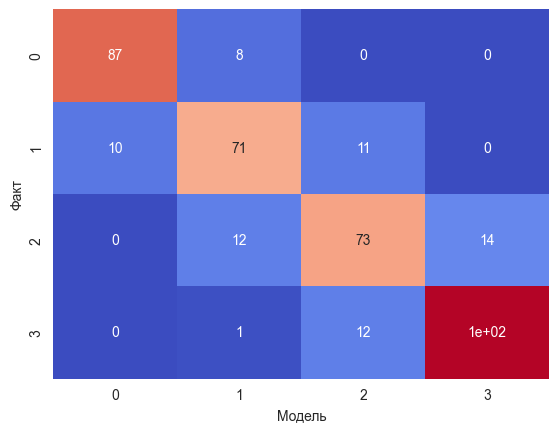

   Metric  Score
 Accuracy  0.830
Precision  0.829
   Recall  0.830
       F1  0.829
      ROC  0.887


In [62]:
metrics(y_test, dt_pred, dt.predict_proba(x_test))

### Выводы

| Метрика   | kNN   | Дерево решений |
|-----------|-------|----------------|
| Accuracy  | 0.955 | 0.830          |
| Precision | 0.955 | 0.831          |
| Recall    | 0.955 | 0.830          |
| F1        | 0.955 | 0.830          |
| ROC       | 0.996 | 0.887          |

Оба метода показали высокие результаты для сбалансированного набора данных. Причём kNN оказался лучше на 10-12 пунктов по всем параметрам - классическое дерево решений работает наилучшим образом с бинарными метками, а в наборе 4 категории.